In [25]:
import heatmap
import seaborn as sns
import matplotlib.pyplot as plt

show_id = "tt0903747"
show_name = heatmap.get_show_name(show_id)
episodes = heatmap.get_episodes(show_id)
episode_ratings = heatmap.get_ratings(episodes)

In [26]:
df_merged = episodes.merge(episode_ratings, on='tconst', how='outer')
df_mapped = df_merged.pivot('episodeNumber', 'seasonNumber', 'averageRating')

print(df_mapped)

seasonNumber     1    2    3    4     5
episodeNumber                          
1              9.1  8.7  8.6  9.3   9.3
2              8.7  9.3  8.7  8.3   8.9
3              8.8  8.4  8.5  8.1   8.9
4              8.3  8.3  8.3  8.7   8.9
5              8.4  8.4  8.7  8.7   9.7
6              9.3  8.9  9.3  8.5   9.1
7              8.9  8.7  9.6  8.9   9.6
8              NaN  9.2  8.8  9.3   9.6
9              NaN  9.2  8.5  8.9   9.5
10             NaN  8.6  7.9  9.6   9.2
11             NaN  8.9  8.5  9.7   9.6
12             NaN  9.3  9.5  9.5   9.2
13             NaN  9.3  9.7  9.9   9.8
14             NaN  NaN  NaN  NaN  10.0
15             NaN  NaN  NaN  NaN   9.7
16             NaN  NaN  NaN  NaN   9.9


[Text(0.5, 48.5, 'Seasons'),
 Text(120.5, 0.5, 'Episodes'),
 Text(0.5, 1.0, 'Breaking Bad')]

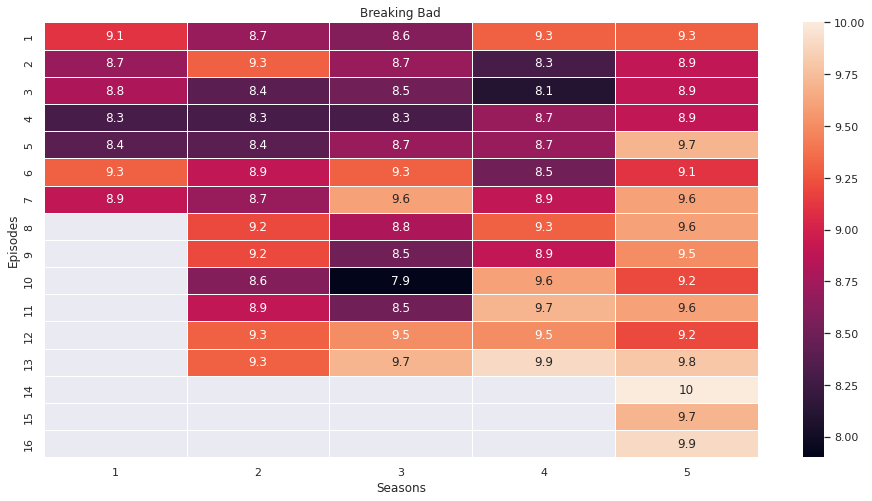

In [27]:
# size = (df_merged['seasonNumber'].max()//2+1, df_merged['episodeNumber'].max()//2+1)
sns.set(rc={'figure.figsize': (16,8)})
plt.tight_layout()

map = sns.heatmap(df_mapped,
    annot=True, 
    linewidths=0.5, 
    square=False) #vmin=0, vmax=10

map.set(xlabel='Seasons',
    ylabel='Episodes', 
    title=show_name)

In [28]:
figure = map.get_figure()
figure.savefig('./heatmaps/' + show_name+ ' - ' + show_id + '.png', 
    dpi=300, 
    pad_inches='0.1')